In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.integrate import quad
from scipy import integrate as intg
import sympy as sp
from scipy import stats
from scipy.interpolate import UnivariateSpline
import pandas as pd
from scipy.stats import linregress
from scipy.stats import norm
import os
import seaborn as sns
from matplotlib import pyplot as plt, patches
import statistics 
import tkinter as tk
from tkinter import messagebox
import base64
import requests

In [15]:
url = 'https://raw.githubusercontent.com/Astro-CMalhas/Malhas-et-al.-in-prep/main/Galaxy%20CSV%20Files/Shoc22.csv'
df = pd.read_csv(url)
#df.head()

#QuickLoader is the code I wrote to load the galaxies in the ideal format, you will see it in multiple files
def QuickLoader (Gal): 
    wave1 = pd.DataFrame(Gal, columns= ['WAVE'])
    err1 = pd.DataFrame(Gal, columns= ['ERR'])
    flux1 = pd.DataFrame(Gal, columns= ['FLUX'])
    cont1 = pd.DataFrame(Gal, columns= ['CONT'])
    wave01 = pd.DataFrame.to_numpy(wave1)
    error01 = pd.DataFrame.to_numpy(err1)
    flux01 = pd.DataFrame.to_numpy(flux1)
    cont01 = pd.DataFrame.to_numpy(cont1)
    error02 = ((error01.flatten()))
    flux = ((flux01.flatten()))
    wave = ((wave01.flatten()))
    cont = ((cont01.flatten()))
    error = error02/cont
    Gal_master = [flux,wave,cont,error]
    return Gal_master

axis_fontsz = 24
ticksz = 18
legsize = 14
txt_size = 15

In [12]:
Shoc22 = pd.read_csv (url)
Shoc22_master = QuickLoader(Shoc22)

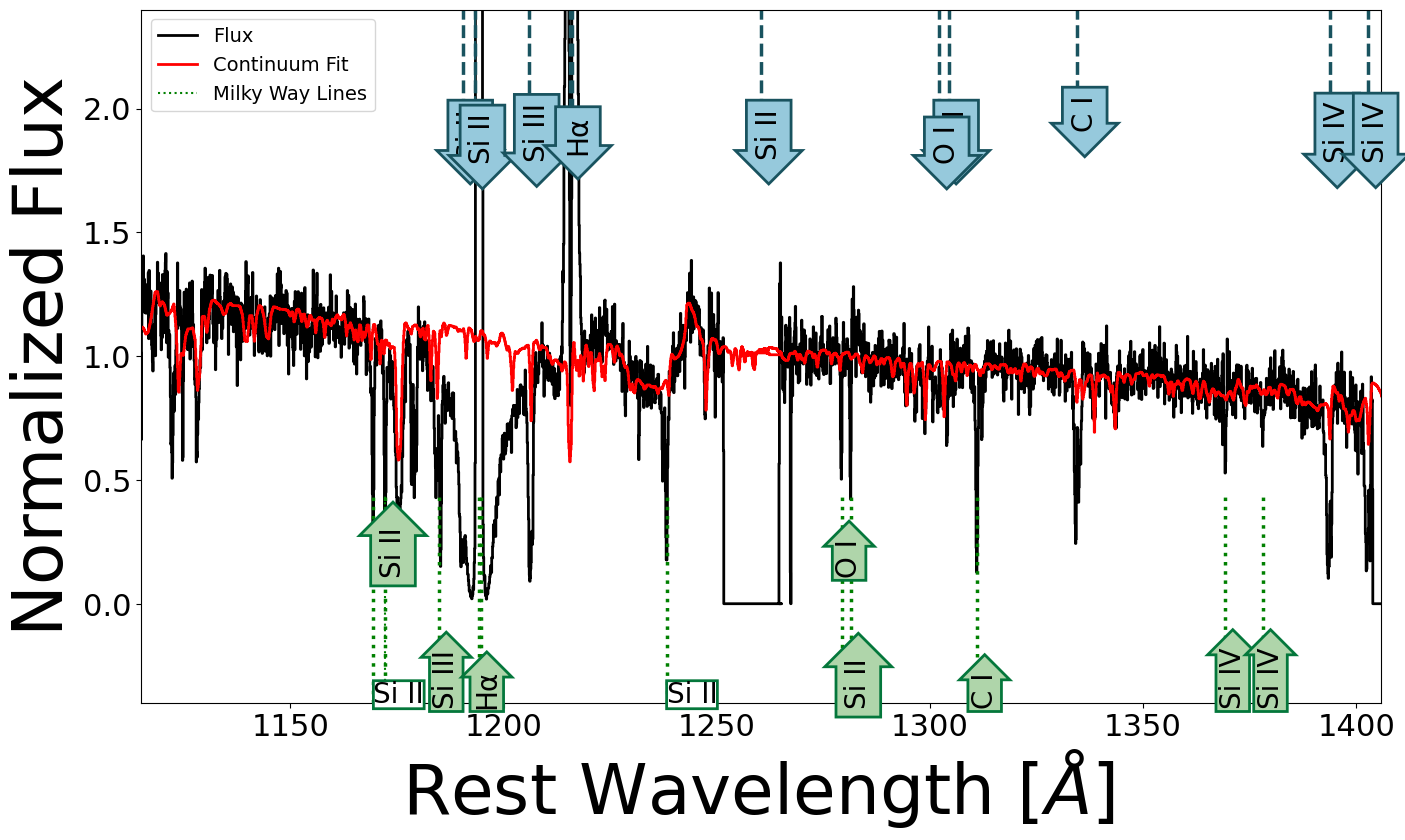

In [19]:
small_line = ([1393.76,"Si IV 1393.755",.513],
              [1334.532,"C II 1334.532",.129],[1302.168,"O I 1302.168",5.2e-2],
            [1206.51,"Si III 1206.51",1.67],[1304.37,"Si II 1304.37",.797])

[error,flux,wave,cont ]= [Shoc22_master[3],Shoc22_master[0],Shoc22_master[1],Shoc22_master[2]]



txt_size2 = 20


fig = plt.figure(figsize=(16,9))
#plt.plot(wave,flux)
plt.plot(wave, flux,drawstyle = 'steps-mid', color = 'black', label = 'Flux', linewidth = 2)
plt.plot(wave, cont,drawstyle = 'steps-mid', color='red', label = 'Continuum Fit', linewidth = 2)

lines= np.array([1190.416, 1193.28, 1206, 1216,1215.67, 1260.42, 1302.168, 1304.37, 1334.532, 1393.76, 1402.770])
MWlines = lines/(1+.0179 )
#print (MWlines)
y_low = 1.2
testlow = .1

#Bottom
for MW in MWlines:
    plt.axvline(x=MW, color='green', ymin=0, ymax=0.3, linewidth = 2.5, linestyle = 'dotted')
    #plt.text(MW - 1.5,.01,int(MW), fontsize = txt_size2, rotation='vertical',
             ##bbox=dict(boxstyle="rarrow,pad=0.3", fc="#CD5C5C", ec="r", lw=2))
plt.axvline(x=MWlines[1], color='green', ymin=0, ymax=0.3, label = 'Milky Way Lines', linestyle = 'dotted')    
toplinecolor = '#19535F'
#TOP
for VEL in lines:
    #print (VEL)
    plt.axvline(x=VEL, color=toplinecolor, ymin = 0.8, ymax = 1, linewidth = 2.5, linestyle = 'dashed')
    #plt.text(VEL-1.5,1.89,int(VEL), fontsize = txt_size2, rotation='vertical',
             #bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec="b", lw=2))
plt.axvline(x=lines[1], color=toplinecolor, ymin = 0.8, ymax = 1, linestyle = 'dashed')



LineLabels = ['Si II', 'Si IV', 'Si III', 'C I', 'O I', 'H\u03B1']  
#Dumb way to do it, but this is for the Vel Lines
arrowcolor ='#96C9DC'
topedgecolor = '#19535F'
bottomarrowcolor = '#AFD5AA'
bottomedgecolor= '#04773B'
stagger_top = 1.8
toplinecolor = '#19535F'
#Si II
top = 1.82
plt.text((lines[0])-1.5,top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3",fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[5])-1.5,top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[1])-1.5,stagger_top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[7])-1.5,top,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))


# Si III
plt.text((lines[2])-1.5,top-.01,LineLabels[2], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
#Si IV
plt.text((lines[9])-1.5,top-.015,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
plt.text((lines[10])-1.5,top-.015,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
#O I
plt.text((lines[6])-1.5,stagger_top,LineLabels[4], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
# C I
plt.text((lines[8])-1.5,1.93,LineLabels[3], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))
#Other
plt.text((lines[4])-1.5,top+.02,LineLabels[5], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="larrow,pad=0.3", fc= arrowcolor, ec=topedgecolor, lw=2))

#Still dumb but here is the MW contaminant lines
#Si II
bottom = -.4
stagger_bottom = .13
plt.text((MWlines[0]),bottom,LineLabels[0], fontsize = txt_size2, rotation='horizontal',
             bbox=dict(boxstyle="round,pad=0", fc= 'white', ec=bottomedgecolor, lw=2))


plt.text((MWlines[5]),bottom,LineLabels[0], fontsize = txt_size2, rotation='horizontal',
             bbox=dict(boxstyle="round,pad=0", fc= 'white', ec=bottomedgecolor, lw=2))


plt.text((MWlines[1])-1.5,stagger_bottom,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.3", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
plt.text((MWlines[7])-1.5,bottom,LineLabels[0], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.3", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))

#widthB=1.0,lengthB=0.2,angleB=None

plt.annotate("",
            xy=((MWlines[0])-1.5, bottom), xycoords='axes fraction',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="bar"),
            )


# Si III
plt.text((MWlines[2])-1.5,bottom,LineLabels[2], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
#Si IV
plt.text((MWlines[9])-1.5,bottom,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
plt.text((MWlines[10])-1.5,bottom,LineLabels[1], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
#O I
plt.text((MWlines[6])-1.5,stagger_bottom,LineLabels[4], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
# C II
plt.text((MWlines[8])-1.5,bottom,LineLabels[3], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))
#Other
plt.text((MWlines[4])-1.5,bottom,LineLabels[5], fontsize = txt_size2, rotation='vertical',
             bbox=dict(boxstyle="rarrow,pad=0.1", fc= bottomarrowcolor, ec=bottomedgecolor, lw=2))



legsize = 16
plt.xlim(wave.min()+10,wave.max()-10)
plt.ylim(-0.4,2.4)
axis_fontszfig1 = 50
plt.xlabel(r'Rest Wavelength [$\AA$] ', fontsize = axis_fontszfig1)
plt.ylabel( 'Normalized Flux', fontsize = axis_fontszfig1)
plt.yticks(fontsize=ticksz+4)
plt.xticks(fontsize=ticksz+4)
#plt.legend()
leg = plt.legend(prop={"size":legsize-2}, loc = 0)


#images_dir = '/content/gdrive/MyDrive/Project'
plt.savefig('Figure 1 Shoc22')
plt.show()